In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score

C:\Users\Laptech\AppData\Local\Temp\ipykernel_12320\311431551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
csv_file_path = 'input(50)=3.2-3.6 ahakku , output(1)=4.2 ahakku train.csv'

df = pd.read_csv(csv_file_path)

df.shape

(524, 51)

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

# y = y*100

X_train =X
y_train =y

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# # Print the shapes of the resulting sets
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

In [17]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                3264      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19905 (77.75 KB)
Trainable params: 19905 (77.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss=tf.compat.v1.losses.mean_squared_error)

In [19]:
history = model.fit(X_train, y_train, epochs=50, batch_size=40, validation_split=0.2)

Epoch 1/50
11/11 [==============================] - 3s 89ms/step - loss: 1.1409 - val_loss: 0.3178
Epoch 2/50
11/11 [==============================] - 0s 21ms/step - loss: 0.2244 - val_loss: 0.2061
Epoch 3/50
11/11 [==============================] - 0s 23ms/step - loss: 0.1473 - val_loss: 0.1208
Epoch 4/50
11/11 [==============================] - 0s 18ms/step - loss: 0.1161 - val_loss: 0.0802
Epoch 5/50
11/11 [==============================] - 0s 22ms/step - loss: 0.0865 - val_loss: 0.0556
Epoch 6/50
11/11 [==============================] - 0s 23ms/step - loss: 0.0640 - val_loss: 0.0349
Epoch 7/50
11/11 [==============================] - 0s 19ms/step - loss: 0.0421 - val_loss: 0.0186
Epoch 8/50
11/11 [==============================] - 0s 23ms/step - loss: 0.0265 - val_loss: 0.0107
Epoch 9/50
11/11 [==============================] - 0s 24ms/step - loss: 0.0195 - val_loss: 0.0088
Epoch 10/50
11/11 [==============================] - 0s 20ms/step - loss: 0.0161 - val_loss: 0.0074
Epoch 11/

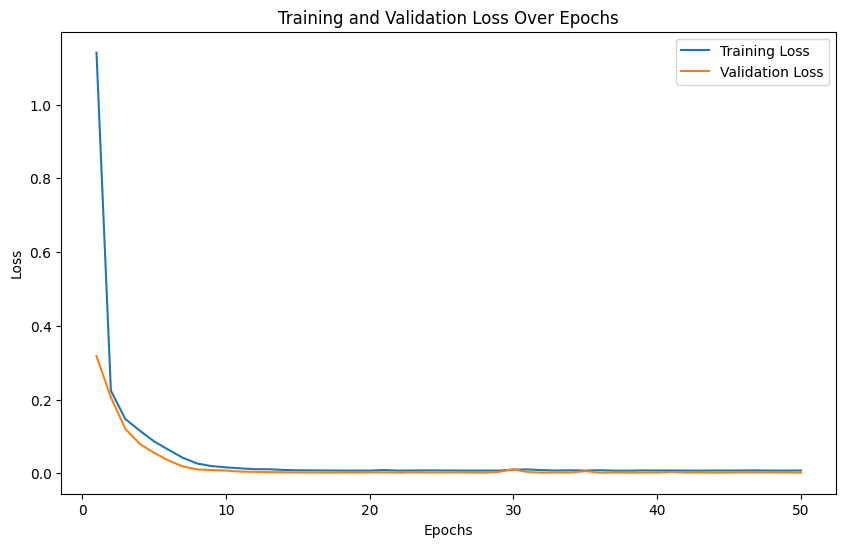

In [20]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(train_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# # Evaluate the model on the test set
# loss = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss}")
# accuracy = 1 - loss
# print(f"Accuracy: {accuracy}")

In [9]:
# predictions = model.predict(X_test)

# r2 = r2_score(y_test, predictions)
# print(f"R-squared (R2) Score: {r2}")

In [10]:
# y_test_values = y_test.to_numpy().flatten()

# predictions = model.predict(X_test).flatten()

# differences = y_test_values - predictions

# sns.histplot(differences, bins=20, kde=True, color='blue', edgecolor='black', alpha=0.7)
# plt.xlabel('Difference (True Value - Predicted Value)')
# plt.ylabel('Frequency')
# plt.title('Distribution of Differences between True Values and Predictions with KDE')
# plt.show()

#### Plot actual values vs predictions

In [11]:

# predictions = model.predict(X_test).flatten()
# plt.scatter(y_test, predictions,marker='.')
# plt.xlabel('Actual Values')
# plt.ylabel('Predictions')
# plt.title('Actual Values vs Predictions')

# plt.xlim(0.8, 1.15)
# plt.ylim(0.8, 1.15)

# plt.plot([0,2], [0,2], color='red', linestyle='--', label='Slope 1 Line')

# plt.show()

In [21]:
csv_file_path = 'input(50)=3.2-3.6 ahakku , output(1)=4.2 ahakku test.csv'

df = pd.read_csv(csv_file_path)

df.shape

(125, 51)

In [22]:
X_test_ = df.iloc[:, :-1]
y_test_ = df.iloc[:, -1:]


In [23]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_, y_test_)
print(f"Test Loss: {loss}")
accuracy = 1 - loss
print(f"Accuracy: {accuracy}")

4/4 [==============================] - 0s 4ms/step - loss: 0.0036
Test Loss: 0.0035522463731467724
Accuracy: 0.9964477536268532


In [24]:
predictions = model.predict(X_test_)

r2 = r2_score(y_test_, predictions)
print(f"R-squared (R2) Score: {r2}")

4/4 [==============================] - 0s 6ms/step
R-squared (R2) Score: 0.9848798389984275


4/4 [==============================] - 0s 2ms/step


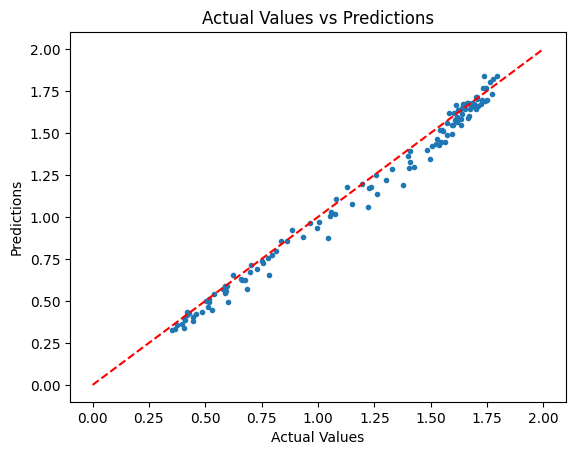

In [28]:
predictions = model.predict(X_test_).flatten()
plt.scatter(y_test_, predictions,marker='.')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual Values vs Predictions')

# plt.xlim(0.8, 1.15)
# plt.ylim(0.8, 1.15)

plt.plot([0,2], [0,2], color='red', linestyle='--', label='Slope 1 Line')

plt.show()